# O arquivos de GPR SEGY em Python 

Este notebook tem a intenção de demonstrar como carregar um dado sísmico 3D em Python. Posteriormente, este tipo de dado será utilizado para filtragem, demonstração de atributos sísmicos e outras aplicações. 

## Os dados utilizados

Aqui utilizaremos um conjunto de dados do Sul do Texas, do campo de exploração [Stratton](https://wiki.seg.org/wiki/Stratton_3D_survey). Este é um dado terrestre 3D pós-empilhamento. Excelente para testar algoritmos ou quaisquer outras aplicações de dados sísmicos. Estes dados foram cedido pelo [Departamento de Geologia Econômica da Universidade do Texas](https://www.beg.utexas.edu/).

## Arquivos SEGY

Este formato foi inicialmente desenvolvido pela SEG no início dos anos 70 com o objetivo de uniformizar os dados sísmicos para processamento. O formato passou por algumas revisões ao longo do tempo pelo comitê de ténico da SEG ([SEG Technical Standards](https://seg.org/Publications/SEG-Technical-Standards)). Este comitê é acionado toda vez que é identificado um problema de grande magnitude no padronamento dos mais diversos dados geofísicos, junto organizações do setor bem como da indústria. O arquivo SEGY armazena os dados de forma sequencial, como pode ser visto na figura abaixo:

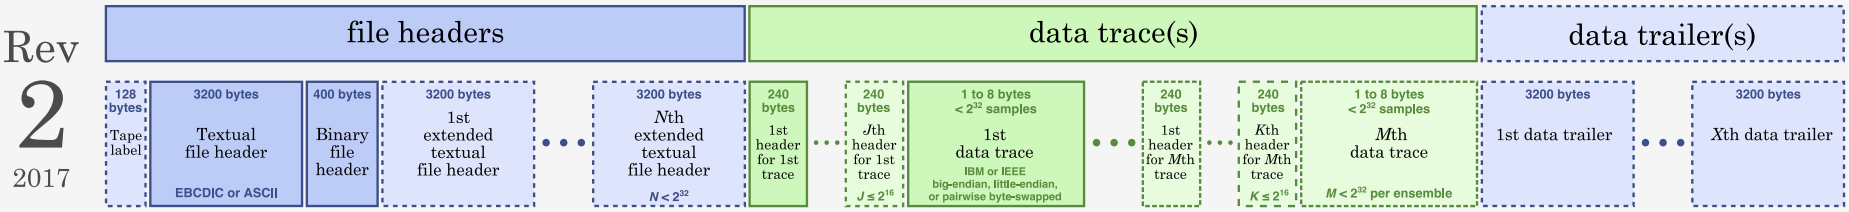

Os componentes principais de um dado SEG-Y são:
- Cabeçalho Textual
- Cabeçalho binário do arquivo
- Traços sísmicos, subdivididos por sua vez em:
  - Cabeçalho binário do traço
  - Dados do traço
- Algumas informações adicionais

No cabeçalho textual contém informações que podem ser lidas fora de qualquer software especializado. No cabeçalho binário contém informações sobre a quantidade de traços, intervalo de amostragem e outras informações relevantes. Nas informações do traço estão os valores das inlines e crosslines, posição e coordenadas. Informações adicionais, como correções e outras informações relevantes são adicionadas no fim do arquivo.

## Carregamento dos arquivos SEGY em Python

O carregamento destes dados pode ser realizado pela biblioteca [SEGYio](https://github.com/equinor/segyio), que é desenvolvida em linguagens C e Python. Além do formato SEGY, esta biblioteca tem forte interação com formato de dados do Seismic Unix. Este biblioteca é desenvolvida pela [Equinor](https://www.equinor.com.br/). 

## Importando as bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import segyio
import xarray

## Informações do arquivo com o dados GPR

In [2]:
with segyio.open("dataset/GPR_itapemirim_river_delta_D.sgy",iline=73,xline=77) as f:
    print (f)
    n_ilines = f.ilines
    n_cross = f.xlines
    inline = f.iline[f.ilines[0]]
    crossline = f.xline[f.xlines[101]]
    time = f.samples

SegyFile dataset/GPR_itapemirim_river_delta_D.sgy:
  inlines: 1 [2500, 2500]
  crosslines: 250 [5000, 20]
  traces: 250
  samples: [  0.      0.926   1.852   2.778   3.704   4.63    5.556   6.482   7.408
   8.334   9.26   10.186  11.112  12.038  12.964  13.89   14.816  15.742
  16.668  17.594  18.52   19.446  20.372  21.298  22.224  23.15   24.076
  25.002  25.928  26.854  27.78   28.706  29.632  30.558  31.484  32.41
  33.336  34.262  35.188  36.114  37.04   37.966  38.892  39.818  40.744
  41.67   42.596  43.522  44.448  45.374  46.3    47.226  48.152  49.078
  50.004  50.93   51.856  52.782  53.708  54.634  55.56   56.486  57.412
  58.338  59.264  60.19   61.116  62.042  62.968  63.894  64.82   65.746
  66.672  67.598  68.524  69.45   70.376  71.302  72.228  73.154  74.08
  75.006  75.932  76.858  77.784  78.71   79.636  80.562  81.488  82.414
  83.34   84.266  85.192  86.118  87.044  87.97   88.896  89.822  90.748
  91.674  92.6    93.526  94.452  95.378  96.304  97.23   98.156  99

In [3]:
inline.shape

(250, 378)

In [4]:
crossline.shape

(1, 378)

In [5]:
crossline.dtype

dtype('float32')

In [6]:
inline.dtype

dtype('float32')

## Visualização dos dados GPR

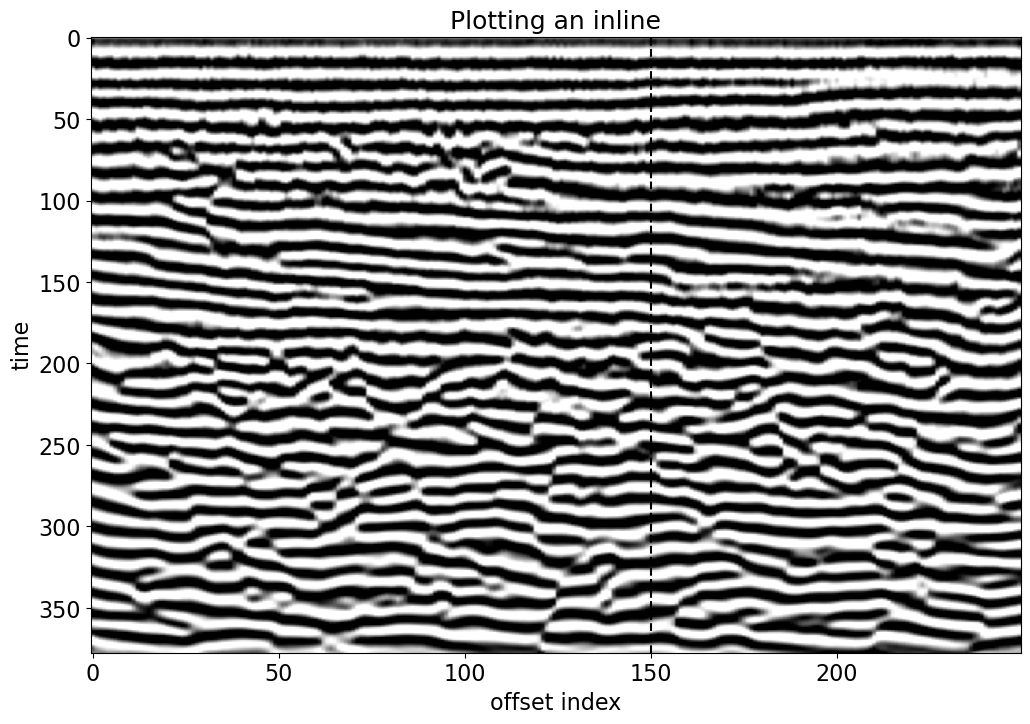

In [7]:
clip = np.percentile(np.abs(crossline), 99.0)
title_font = 18
bottom_font = 16

plt.figure(figsize=(12, 8))
plt.title('Plotting an inline',size=title_font)
plt.imshow(inline.T,aspect="auto",cmap="binary",vmax=clip,vmin=-clip)
plt.axvline(x=150, color="black", linestyle="--")
plt.xlabel('offset index',size=bottom_font)
plt.ylabel('time',size=bottom_font)
plt.xticks(size=bottom_font)
plt.yticks(size=bottom_font)
plt.show()